In [1]:
# demo for the naive bayes classification on wine dataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB



In [2]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target


In [3]:
X.shape, y.shape

((178, 13), (178,))

In [6]:
X[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [11]:
y[140]

2

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import numpy as np
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the classifier
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


# demo on pima dataset

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# Load Pima Indians Diabetes Dataset
# You can download dataset from UCI repository or kaggle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
           "BMI","DiabetesPedigreeFunction","Age","Outcome"]

data = pd.read_csv(url, names=columns)



In [18]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
data.shape

(768, 9)

In [20]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]


In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
# Standardize features (helps Naive Bayes performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [25]:

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [26]:

# Train Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [27]:

# Predictions
y_pred = model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154



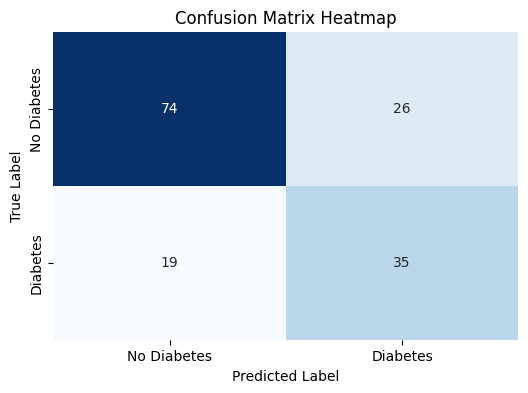

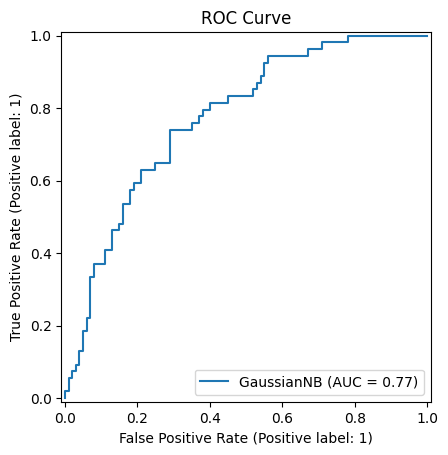

In [ ]:

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()



## classification on Iris dataset   

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



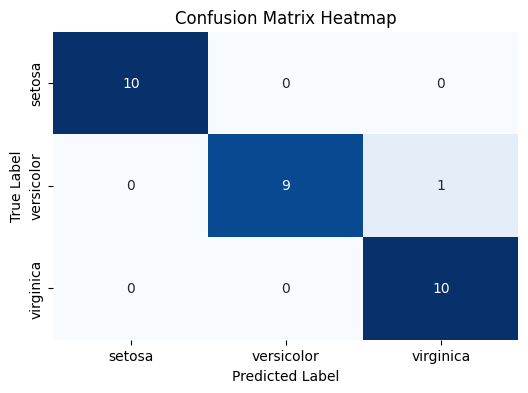

In [29]:
# Create a Gaussian Naive Bayes classifier for iris dataset
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


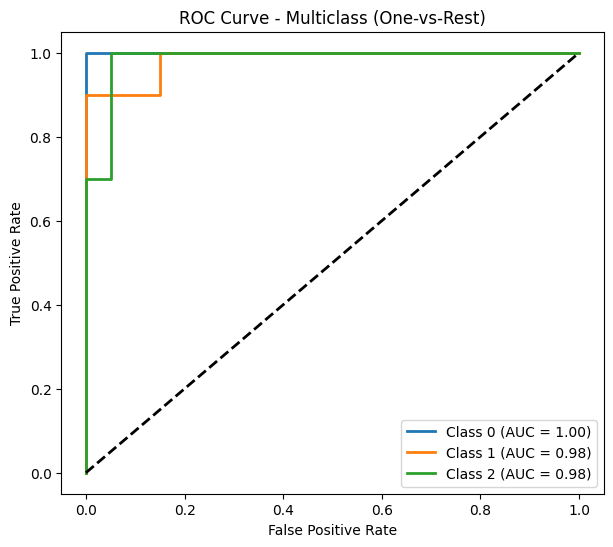

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
import numpy as np

# Binarize labels (for multiclass ROC)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(7,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

# Plot random chance line
plt.plot([0, 1], [0, 1], "k--", lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multiclass (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()
